In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import seaborn as sns
from scipy import stats 
data = pd.read_csv('train.csv', index_col = 'PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [13]:
#Определите количество мужчин и женщин, которые ехали на корабле.
print(data.groupby(['Sex'])['Sex'].count())

Sex
female    314
male      577
Name: Sex, dtype: int64


In [112]:
#Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров.
print(data['Survived'].value_counts()[1])
data['Survived'].value_counts()[1]/(data.Survived.count())

342


0.3838383838383838

In [113]:
#Какую долю пассажиры первого класса составляли среди всех пассажиров
print(data['Pclass'].value_counts()[1])
data['Pclass'].value_counts()[1]/(data.Pclass.count())

216


0.24242424242424243

In [40]:
#Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров.
data['Age'].mean()

29.69911764705882

In [41]:
data['Age'].median()

28.0

In [119]:
#Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. 
#Оцените значение p-value. 
#Постройте плотность распределения признаков SibSp и Parch.
stats.pearsonr(data['SibSp'],data['Parch'])

(0.41483769862015624, 2.2418236681382365e-38)

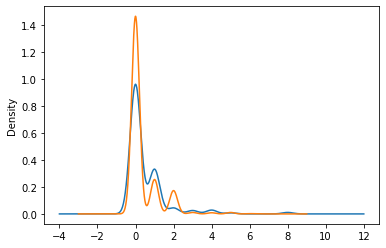

In [126]:
data['SibSp'].plot.kde()
data['Parch'].plot.kde()

In [ ]:
#Какое самое популярное женское имя на корабле? 
#Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name).
#Попробуйте вручную разобрать несколько значений столбца Name 
#и выработать правило для извлечения имен, а также разделения их на женские и мужские.

In [215]:
def findName(String):
    index = String.find('Miss. ')
    if (index != -1):
        index = index + len('Miss. ')
        index2 = String.find(' ', index)
        if(index2 == -1):
            index2 = len(String)
        return (String[index:index2:1])
    else:
        index = String.find('Mrs. ')
        if (index != -1):
            index1 = String.find('(')
            if ((String.find('Mrs', index1))!= -1):
                index1 = -1
            if(index1 != -1):
                index1 = index1 + 1
                index2 = String.find(' ', index1)
                temp = String[index1:index2:1]
                if(temp.isalpha() == False):
                    index1 = index1 + 1
                    index2 = index2 - 1
                return(String[index1:index2:1])
            else:
                index = index + len('Miss. ')
                index2 = String.find(' ', index)
                if(index2 == -1):
                    index2 = len(String)
                return (String[index:index2:1])

In [216]:
data[data['Sex'] == 'female']['Name'].apply(findName).value_counts().idxmax()

'Anna'

In [4]:
#Коррелирует ли класс, которым ехал пассажир, с выживаемостью?
stats.pearsonr(data['Survived'], data['Pclass'])

(-0.33848103596101514, 2.5370473879790813e-25)

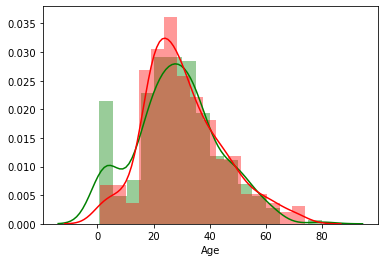

In [5]:
#Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. 
#Сделайте выводы. Отобразите данные на одном и нескольких графиках 
sns.distplot(data[data["Survived"]==1]["Age"],color='green')
sns.distplot(data[data["Survived"]==0]["Age"],color='red')

Больше всего погибло людей от 15 до 40 лет.
Выживших старше 65 нет.

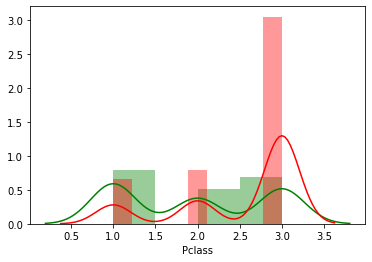

In [199]:
#Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам.. 
#Сделайте выводы.
sns.distplot(data[data["Survived"]==1]["Pclass"],color='green')
sns.distplot(data[data["Survived"]==0]["Pclass"],color='red')

 Самое большое число выживших в первом классе, как и наименьшее число умерших.
 Самое большое число погибших в 3 классе.

c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


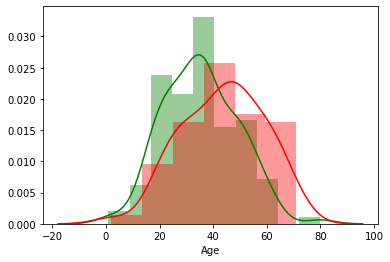

In [198]:
sns.distplot(data[data["Survived"]==1][data['Pclass'] == 1]['Age'],color='green')
sns.distplot(data[data["Survived"]==0][data['Pclass'] == 1]['Age'],color='red')

c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


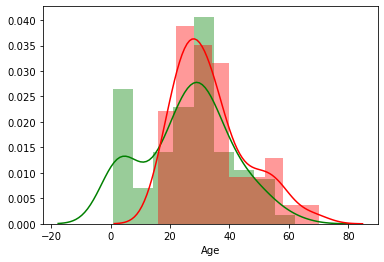

In [197]:
sns.distplot(data[data["Survived"]==1][data['Pclass'] == 2]['Age'],color='green')
sns.distplot(data[data["Survived"]==0][data['Pclass'] == 2]['Age'],color='red')

c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


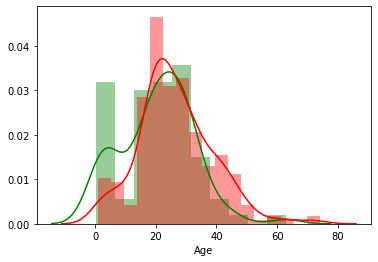

In [196]:
sns.distplot(data[data["Survived"]==1][data['Pclass'] == 3]['Age'],color='green')
sns.distplot(data[data["Survived"]==0][data['Pclass'] == 3]['Age'],color='red')

c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\днс нн\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


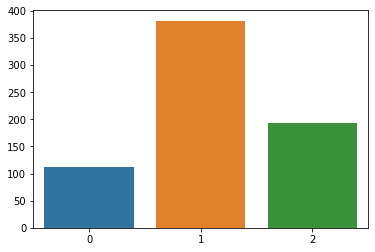

In [7]:
# Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети
sns.barplot(data = [[data[data["Age"]<18].Survived.count()],
                    [data[data["Sex"]=="male"][data["Age"]>18].Survived.count()],
                    [data[data["Sex"]=="female"][data["Age"]>18].Survived.count()]])